In [30]:
from pharynx_analysis import (
    pharynx_io as pio, 
    image_processing as ip, 
    experiment, 
    plots, 
    profile_processing
)

import xarray as xr

reload(logging)
reload(experiment)
reload(pio)
reload(ip)
reload(plots)
reload(profile_processing)

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

In [31]:
xr.load_dataarray('/Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47/analyses/2019-08-07_single_midline_registered/2017_02_22-HD233_SAY47-profile_data.nc')

<xarray.DataArray (strain: 123, wavelength: 5, pair: 2, position: 300)>
array([[[[1719.863225, ..., 2395.024503],
         [1715.275831, ..., 2454.129842]],

        ...,

        [[-270.18823 , ..., -274.139869],
         [-270.182556, ..., -273.455722]]],


       ...,


       [[[1907.049375, ..., 2468.973004],
         [1898.480096, ..., 2415.591233]],

        ...,

        [[-270.480593, ..., -271.983648],
         [-270.693644, ..., -271.912092]]]])
Coordinates:
  * strain      (strain) object 'HD233' 'HD233' 'HD233' ... 'SAY47' 'SAY47'
  * wavelength  (wavelength) object '470' '410' 'r' 'oxd' 'e'
  * pair        (pair) int32 0 1
Dimensions without coordinates: position
Attributes:
    r_min:               0.852
    r_max:               6.65
    instrument_factor:   0.171
    midpoint_potential:  -265.0
    z:                   2
    temperature:         22.0
    strategy:            single_midline

12:46:18 INFO:Starting full pipeline run for /Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47
12:46:18 INFO:Loading Images
12:46:19 INFO:Segmenting pharynxes
12:46:20 INFO:Centering and rotating pharynxes
100%|██████████| 123/123 [00:07<00:00, 15.92it/s]
12:46:29 INFO:Calculating midlines
100%|██████████| 123/123 [00:01<00:00, 120.01it/s]
12:46:30 INFO:Measuring under midlines
100%|██████████| 123/123 [00:03<00:00, 32.22it/s]
12:46:33 INFO:Registering profiles
12:48:47 INFO:Trimming intensity data
12:48:48 INFO:Calculating redox measurements
12:48:48 INFO:Saving 2017_02_22-HD233_SAY47 inside /Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47
12:48:48 INFO:Saving region means to /Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47/analyses/2019-08-07_single_midline/2017_02_22-HD233_SAY47-summary_table.csv
12:48:48 INFO:Saving profile data to /Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47/analyses/2019-08

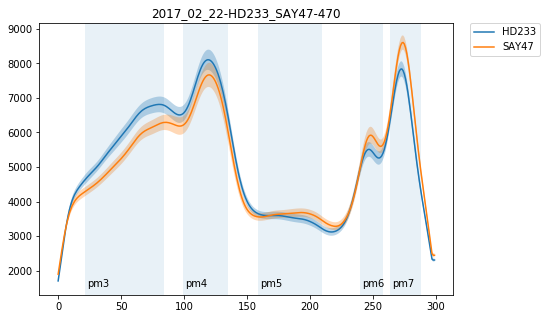

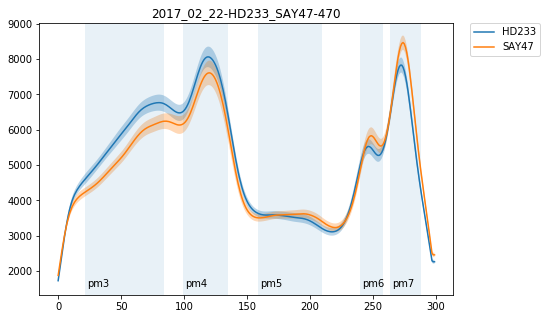

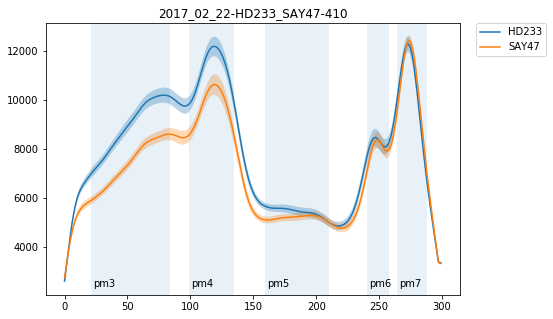

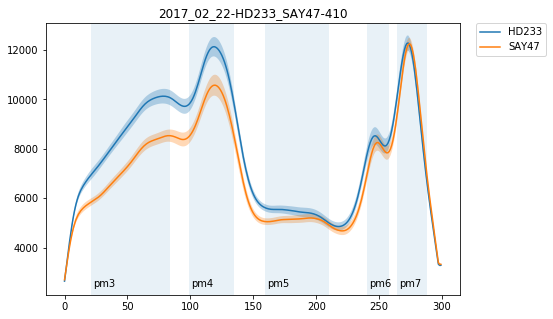

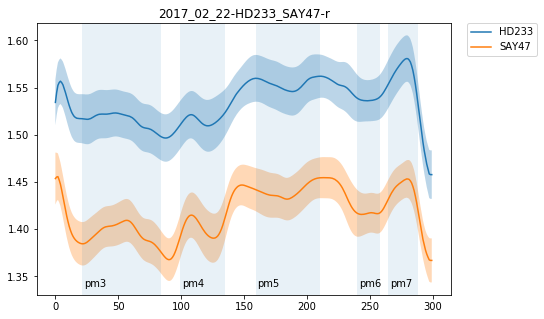

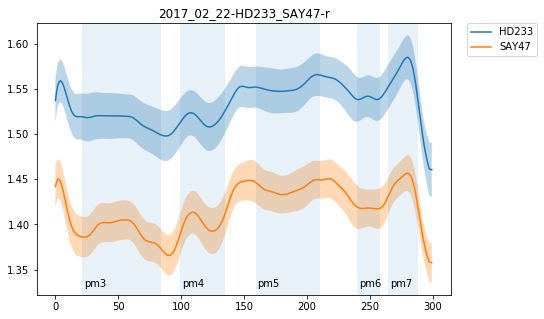

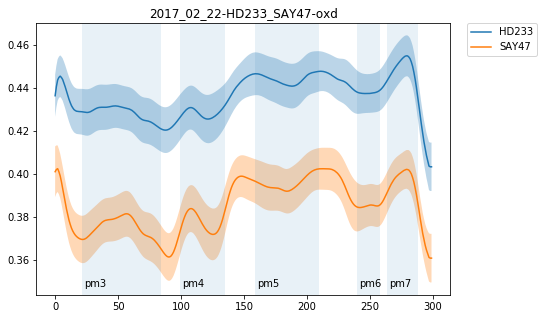

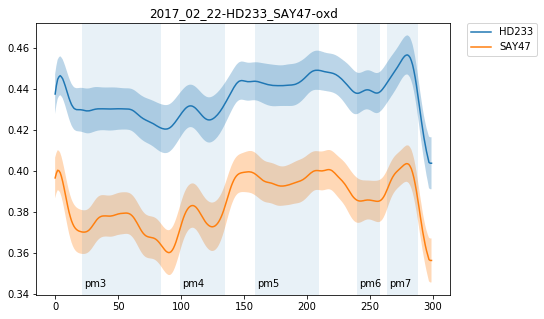

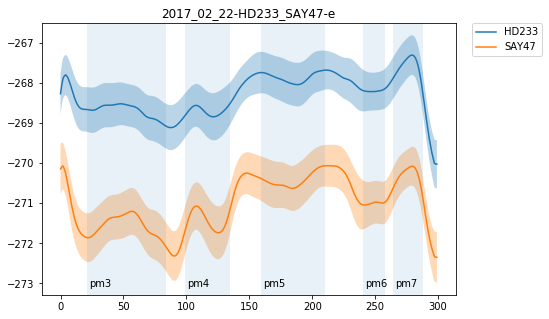

<Figure size 720x360 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

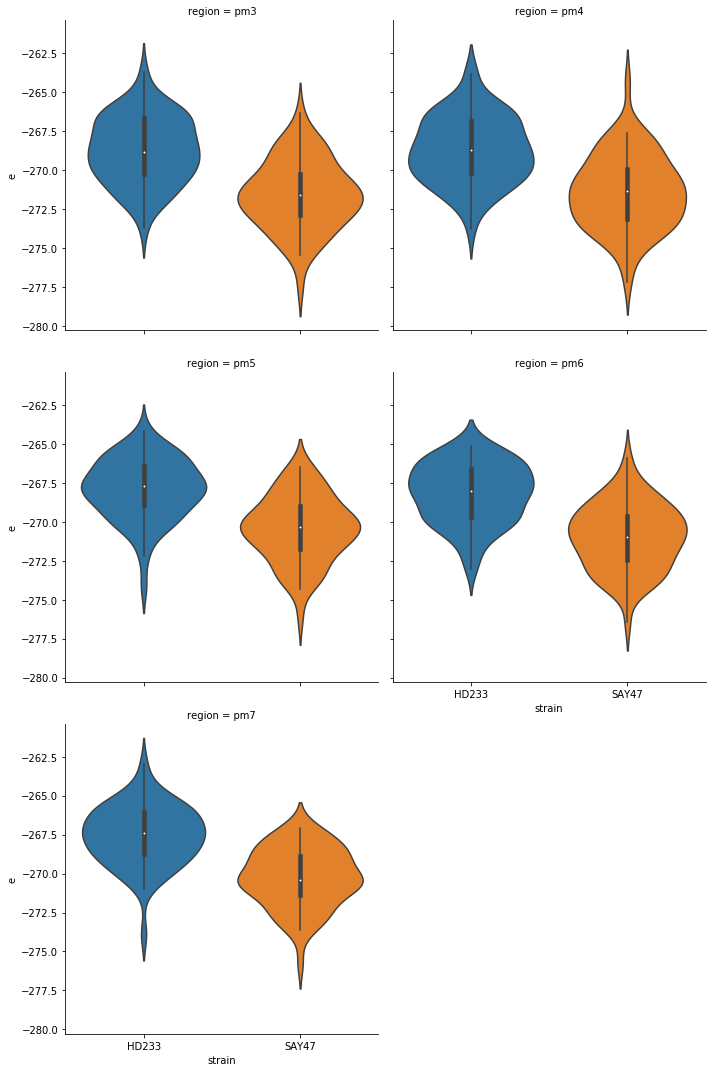

In [29]:
exp_dir = "/Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47"
imaging_scheme = "TL/470/410/470/410"
ex = experiment.PairExperiment(
    exp_dir,
    imaging_scheme,
    strategy='single_midline',
    frame_specific_midlines=False
)
ex.full_pipeline()